## Detrend and Deseasonalize a Time Series

When detrending and/or deseasonalizing a time series you may use one or a combination of approaches such as differencing, subtracting from the mean (or from a mean over a period), calculating percentage change, or using a transformation such as a log transformation. For instance, you make take first difference and then a log transformation or you may use a second difference. As you perform various operations (first difference, second difference, subtracting the mean, log transformation, percentage change), you will gain some intuition about how your data is being altered.

It is not always necessary to detrend and deseasonalize. Be aware that this may or may not apply to your particular data or domain. At times, you can work with the original data as it is. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plot

## Differencing 

Differencing can help to reduce trend and seasonality. You can difference your data by subtraction.  You subtract away the previous period from the current period.  Below you will see that the first observation has a NaN because there was no previous period

In [2]:
# Google trends on a search term "vacation" from 2004 to 2019
df_vacation = pd.read_csv("/Users/karenyang/Desktop/section_2/df_vacation.csv", parse_dates=['Month'], index_col=0)
df_vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


In [3]:
# Example of first differencing
df_vacation['first_diff'] = df_vacation['Num_Search_Vacation'].diff()
df_vacation.head()

,Num_Search_Vacation,first_diff
Month,,
2004-01-01,94,NaN
2004-02-01,89,-5.0
2004-03-01,86,-3.0
2004-04-01,79,-7.0
2004-05-01,89,10.0


In [4]:
# drop the NaN, missing value
df_vacation.dropna(inplace=True)

In [5]:
df_vacation.describe()

,Num_Search_Vacation,first_diff
count,189.000000,189.000000
mean,60.037037,-0.301587
std,15.357225,9.809301
min,35.000000,-23.000000
25%,50.000000,-6.000000
50%,56.000000,-1.000000
75%,70.000000,5.000000
max,100.000000,33.000000


In [6]:
# Example of second differencing
df_vacation['second_diff'] = df_vacation['Num_Search_Vacation'].diff(2)
df_vacation.dropna(inplace=True)
df_vacation.describe()

,Num_Search_Vacation,first_diff,second_diff
count,187.000000,187.000000,187.000000
mean,59.743316,-0.262032,-0.534759
std,15.171011,9.853813,15.500698
min,35.000000,-23.000000,-36.000000
25%,50.000000,-6.000000,-10.500000
50%,56.000000,-1.000000,-1.000000
75%,69.500000,5.000000,11.500000
max,100.000000,33.000000,37.000000


Comparing the mean and standard deviation between the first and second difference, the first difference gives better results and should be sufficient to detrend and deseasonalize the series.

Text(0.5, 1.0, 'Google Trends of Vacation')

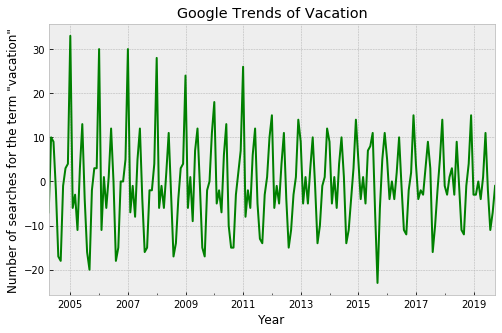

In [7]:
# Plot the time series
plot.style.use('bmh')
ax = df_vacation['first_diff'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Number of searches for the term "vacation"')
ax.set_title('Google Trends of Vacation')

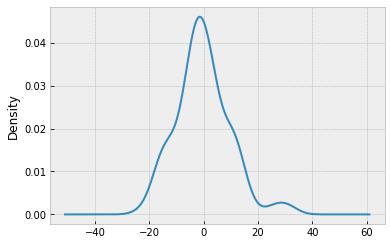

In [8]:
# Plot kernel density plot
df_vacation['first_diff'].plot(kind='kde')

In [9]:
df_vacat = df_vacation[['first_diff']]
df_vacat.head()

,first_diff
Month,
2004-04-01,-7.0
2004-05-01,10.0
2004-06-01,9.0
2004-07-01,-2.0
2004-08-01,-17.0


In [ ]:
# df_vacat.to_csv('vacation_firstdiff.csv')

## Examples of Subtraction from Mean

You can difference your data by subtraction.  You subtract away the previous period from the current period.  Below you will see that the first observation has a NaN because there was no previous period.

In [10]:
df_temp = pd.read_csv("/Users/karenyang/Desktop/section_2/df_temp.csv", parse_dates=['Date'], index_col=0)
df_temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


In [11]:
df_temp['diff_mean'] = df_temp['Value'] - df_temp['Value'].mean()

In [12]:
df_temp.head()

,Value,diff_mean
Date,,
1938-04-01,56.5,0.050412
1938-05-01,64.7,8.250412
1938-06-01,73.5,17.050412
1938-07-01,80.4,23.950412
1938-08-01,81.3,24.850412


In [13]:
df_temp['diff_mean'].describe()

count    9.700000e+02
mean    -3.282048e-14
std      1.753885e+01
min     -4.264959e+01
25%     -1.594959e+01
50%      1.800412e+00
75%      1.675041e+01
max      3.145041e+01
Name: diff_mean, dtype: float64

Text(0.5, 1.0, 'Average Temperature of St. Louis')

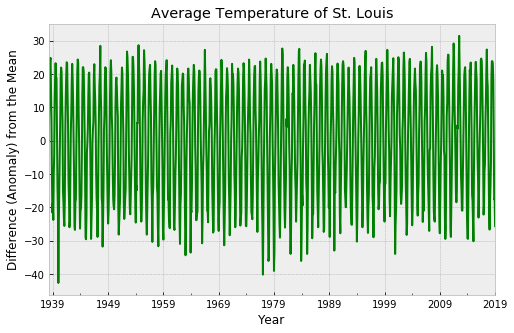

In [14]:
# Plot the time series
plot.style.use('bmh')
ax = df_temp['diff_mean'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Difference (Anomaly) from the Mean')
ax.set_title('Average Temperature of St. Louis')

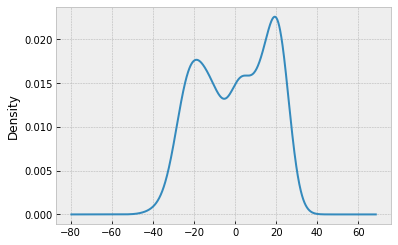

In [15]:
df_temp['diff_mean'].plot(kind='kde')

In [16]:
stl_temp = df_temp[['diff_mean']]
stl_temp.head()

,diff_mean
Date,
1938-04-01,0.050412
1938-05-01,8.250412
1938-06-01,17.050412
1938-07-01,23.950412
1938-08-01,24.850412


In [ ]:
# stl_temp.to_csv('temp_diffmean.csv')

## Examples of Percentage Change

In [17]:
df_furniture = pd.read_csv("/Users/karenyang/Desktop/section_2/df_furniture.csv", parse_dates=['Month'], index_col=0)
df_furniture.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


In [18]:
df_furniture['furniture_pct_change']= df_furniture['furniture_price_adjusted'].pct_change()
df_furniture.head()

,furniture_price_adjusted,furniture_pct_change
Month,,
1992-01-01,2073.432724,NaN
1992-02-01,2114.485812,0.019800
1992-03-01,2260.570891,0.069088
1992-04-01,2255.103236,-0.002419
1992-05-01,2331.414618,0.033839


In [19]:
df_furniture.dropna(inplace=True)

In [20]:
df_furniture['furniture_pct_change'].describe()

count    330.000000
mean       0.009588
std        0.094790
min       -0.284492
25%       -0.032020
50%        0.022959
75%        0.073826
max        0.179970
Name: furniture_pct_change, dtype: float64

Text(0.5, 1.0, 'Retail Sales of Furniture and Furnishings')

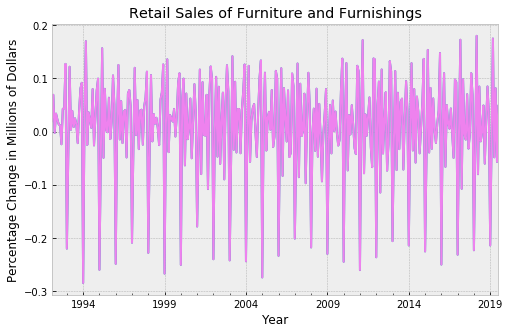

In [21]:
df_furniture['furniture_pct_change'].plot()
# Plot the time series
plot.style.use('bmh')
ax = df_furniture['furniture_pct_change'].plot(color='violet', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Furnishings')

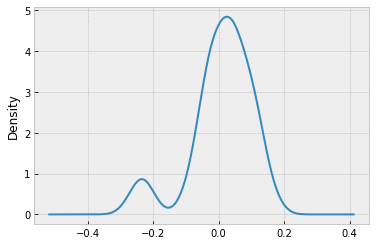

In [22]:
df_furniture['furniture_pct_change'].plot(kind='kde')

In [23]:
df_furn = df_furniture[['furniture_pct_change']]
df_furn.head()

,furniture_pct_change
Month,
1992-02-01,0.019800
1992-03-01,0.069088
1992-04-01,-0.002419
1992-05-01,0.033839
1992-06-01,0.022829


In [ ]:
# df_furn.to_csv('furn_pctchange.csv')

In [ ]:
# Another example of percentage change for adjusted close stock price

In [24]:
# Bank of America example
df_bac = pd.read_csv("/Users/karenyang/Desktop/section_2/df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
df_bac.head()

,Adj Close Price
Date,
1990-01-02,1.711862
1990-01-03,1.725632
1990-01-04,1.688917
1990-01-05,1.652200
1990-01-08,1.661379


In [25]:
# Convert the daily data to weekly data

df_bac= df_bac.resample(rule='W').last() # Don't use how='last', deprecated
# rule is weekly
# last means last day of the week

In [26]:
df_bac['return'] = df_bac['Adj Close Price'].pct_change()
df_bac.dropna(inplace=True)
df_bac.head()

,Adj Close Price,return
Date,,
1990-01-14,1.569591,-0.050000
1990-01-21,1.624664,0.035088
1990-01-28,1.578769,-0.028249
1990-02-04,1.574180,-0.002907
1990-02-11,1.546643,-0.017493


In [27]:
df_bac['return'].describe()

count    1554.000000
mean        0.003489
std         0.058007
min        -0.447267
25%        -0.021401
50%         0.002766
75%         0.026577
max         0.834395
Name: return, dtype: float64

Text(0.5, 1.0, 'Adjusted Closing Price for Bank of America')

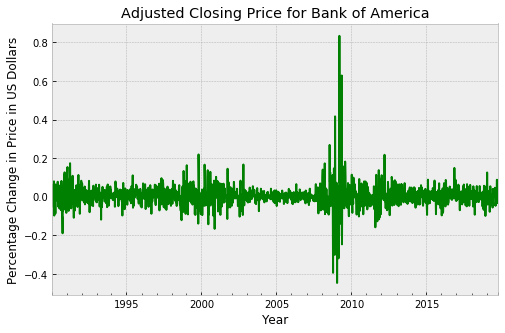

In [28]:
# Plot the time series
plot.style.use('bmh')
ax = df_bac['return'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Price in US Dollars')
ax.set_title('Adjusted Closing Price for Bank of America')

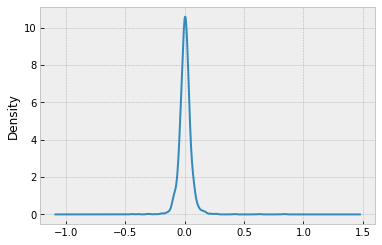

In [29]:
df_bac['return'].plot(kind='kde')

In [30]:
df_BAC = df_bac[['return']]
df_BAC.head()

,return
Date,
1990-01-14,-0.050000
1990-01-21,0.035088
1990-01-28,-0.028249
1990-02-04,-0.002907
1990-02-11,-0.017493


In [ ]:
# df_BAC.to_csv("bac_return.csv")

In [ ]:
# Another example of percentage change for adjusted close stock price

In [31]:
# Example of J.P. Morgan
df_jpm = pd.read_csv("/Users/karenyang/Desktop/section_2/df_jpmorgan.csv", parse_dates=['Date'], index_col=0)
df_jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


In [32]:
# Convert the daily data to weekly data

df_jpm= df_jpm.resample(rule='W').last() # Don't use how='last', deprecated
# rule is weekly
# last means last day of the week

In [33]:
df_jpm['return'] = df_jpm['Adj Close Price'].pct_change()
df_jpm.dropna(inplace=True)
df_jpm.head()

,Adj Close Price,return
Date,,
1990-01-14,3.549875,-0.056000
1990-01-21,3.474666,-0.021186
1990-01-28,3.188872,-0.082251
1990-02-04,3.143746,-0.014151
1990-02-11,3.113662,-0.009570


Text(0.5, 1.0, 'Adjusted Closing Price for J.P. Morgan')

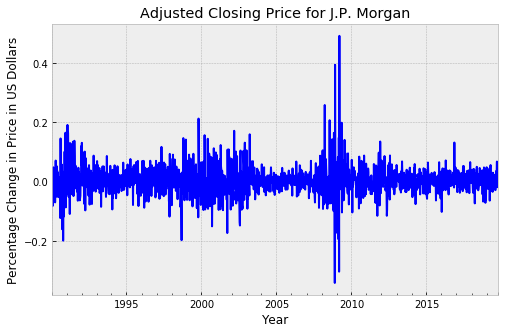

In [34]:
# Plot the time series
plot.style.use('bmh')
ax = df_jpm['return'].plot(color='blue', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Price in US Dollars')
ax.set_title('Adjusted Closing Price for J.P. Morgan')

In [35]:
df_JPM = df_jpm[['return']]
df_JPM.head()

,return
Date,
1990-01-14,-0.056000
1990-01-21,-0.021186
1990-01-28,-0.082251
1990-02-04,-0.014151
1990-02-11,-0.009570


In [ ]:
# df_JPM.to_csv('jpm_return.csv')

## Log Transformation

In [36]:
# Example of log transformation
# use numpy log
df_furniture['furniture_log'] = np.log(df_furniture['furniture_price_adjusted'])
df_furniture.head()

,furniture_price_adjusted,furniture_pct_change,furniture_log
Month,,,
1992-02-01,2114.485812,0.019800,7.656567
1992-03-01,2260.570891,0.069088,7.723373
1992-04-01,2255.103236,-0.002419,7.720951
1992-05-01,2331.414618,0.033839,7.754230
1992-06-01,2384.638567,0.022829,7.776803


In [37]:
df_furniture['furniture_log'].describe()

count    330.000000
mean       8.626849
std        0.394543
min        7.656567
25%        8.365873
50%        8.718767
75%        8.907778
max        9.290399
Name: furniture_log, dtype: float64

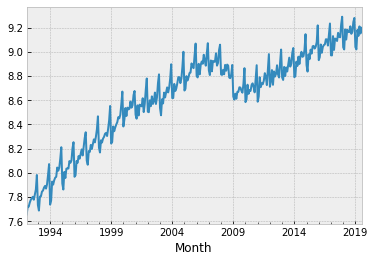

In [38]:
df_furniture['furniture_log'].plot()

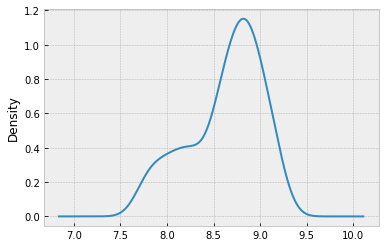

In [39]:
df_furniture['furniture_log'].plot(kind='kde')

For the furniture data, the mean and standard deviation results are better with percentage change as opposed to a log transformation. 